In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

,title,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,away_x,57.6174,65.9536,40.5702,46.5928,33.0241,63.5150,36.4490,39.9630,39.0440,...,47.4881,64.3738,91.6400,65.9709,50.8506,67.3725,45.2516,41.6776,29.3462,57.4661
1,bullseye_x,50.4247,70.2555,38.3594,70.6450,65.8755,59.2693,29.5575,49.6774,68.9950,...,62.5603,55.3652,65.0443,62.6913,73.4287,36.8943,59.8400,60.8537,51.8721,37.0266
2,circle_x,39.7933,65.0259,85.6648,85.5710,58.6727,45.6174,32.8314,42.1423,54.2564,...,50.4922,53.8462,56.4514,64.8020,48.5622,65.7556,85.1801,63.0902,51.4671,34.5753
3,dino_x,50.0000,51.2821,67.9487,55.3846,57.4359,35.6410,77.6923,32.0513,30.0000,...,48.7179,68.4615,32.5641,61.2821,49.4872,51.5385,48.2051,52.5641,95.3846,56.1538
4,dots_x,50.7521,25.4836,75.8710,77.6820,51.8356,25.9288,50.8127,52.5093,52.5897,...,50.8627,52.7292,50.4227,77.9544,75.1525,27.8783,50.4589,50.7253,52.0288,75.2634


In [ ]:

df = pd.read_csv('datasaurus.txt', sep='\t')
#rename unnamed column to title
df.rename(columns={'Unnamed: 0':'title'}, inplace=True)
df.head()

In [17]:
# split title into figname, axis by _

df['figname'] = df['title'].str.split('_').str[:-1].str.join('_')
df['axis'] = df['title'].str.split('_').str[-1]
# frop title, reorganize columns so figname and axis are first
df.drop(columns=['title'], inplace=True)
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]    
df = df[cols]
df.head()

,figname,axis,1,2,3,4,5,6,7,8,...,133,134,135,136,137,138,139,140,141,142
0,away,x,57.6174,65.9536,40.5702,46.5928,33.0241,63.5150,36.4490,39.9630,...,47.4881,64.3738,91.6400,65.9709,50.8506,67.3725,45.2516,41.6776,29.3462,57.4661
1,bullseye,x,50.4247,70.2555,38.3594,70.6450,65.8755,59.2693,29.5575,49.6774,...,62.5603,55.3652,65.0443,62.6913,73.4287,36.8943,59.8400,60.8537,51.8721,37.0266
2,circle,x,39.7933,65.0259,85.6648,85.5710,58.6727,45.6174,32.8314,42.1423,...,50.4922,53.8462,56.4514,64.8020,48.5622,65.7556,85.1801,63.0902,51.4671,34.5753
3,dino,x,50.0000,51.2821,67.9487,55.3846,57.4359,35.6410,77.6923,32.0513,...,48.7179,68.4615,32.5641,61.2821,49.4872,51.5385,48.2051,52.5641,95.3846,56.1538
4,dots,x,50.7521,25.4836,75.8710,77.6820,51.8356,25.9288,50.8127,52.5093,...,50.8627,52.7292,50.4227,77.9544,75.1525,27.8783,50.4589,50.7253,52.0288,75.2634


In [31]:
from minepy import MINE
import dcor 
from scipy.stats import pearsonr


def dcor_dcov(x, y):
    return dcor.distance_correlation(x, y), dcor.distance_covariance(x, y)


def mic_tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic(), m.tic()



figname: dino
mic: 0.18
tic: 2.67
dcor: 0.16
dcov: 2.36
pearson: -0.064



/home/fcastellano/.conda/envs/memoria/lib/python3.10/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(pyobject, 1d, C), array(pyobject, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


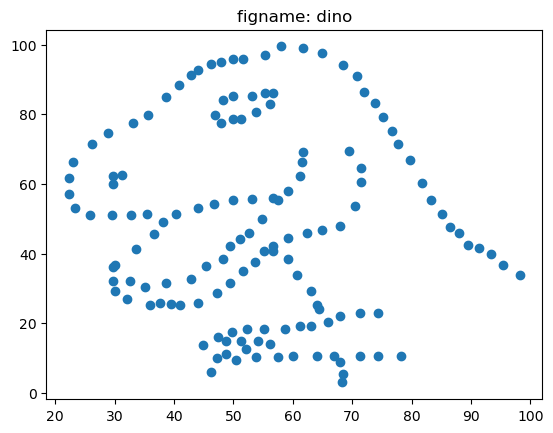

/tmp/ipykernel_62746/3687223422.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_df = pd.concat([corr_df, pd.DataFrame({'figname': figname, 'mic': mic_, 'tic': tic_, 'dcor': dcor_, 'dcov': dcov_, 'pearson': pearson}, index=[0])])


figname: away
mic: 0.15
tic: 1.77
dcor: 0.13
dcov: 2.10
pearson: -0.064



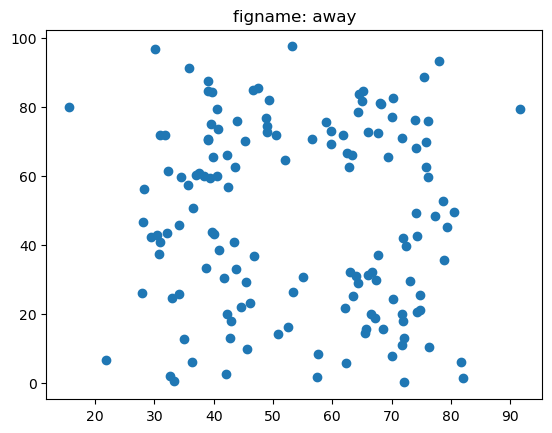

figname: slant_down
mic: 0.21
tic: 2.87
dcor: 0.16
dcov: 2.29
pearson: -0.069



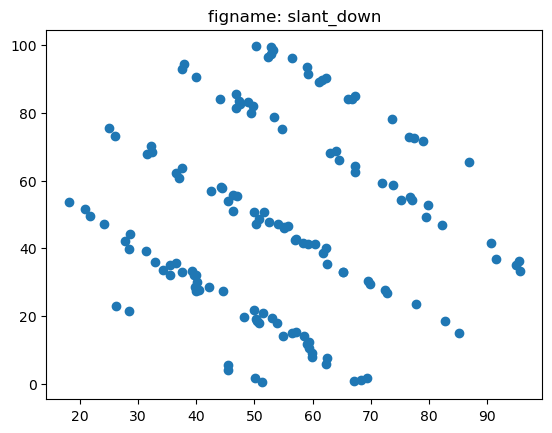

figname: slant_up
mic: 0.22
tic: 3.37
dcor: 0.19
dcov: 2.79
pearson: -0.069



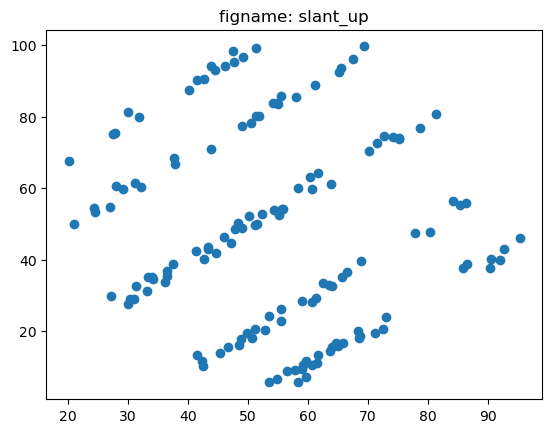

figname: star
mic: 0.59
tic: 8.79
dcor: 0.37
dcov: 5.90
pearson: -0.063



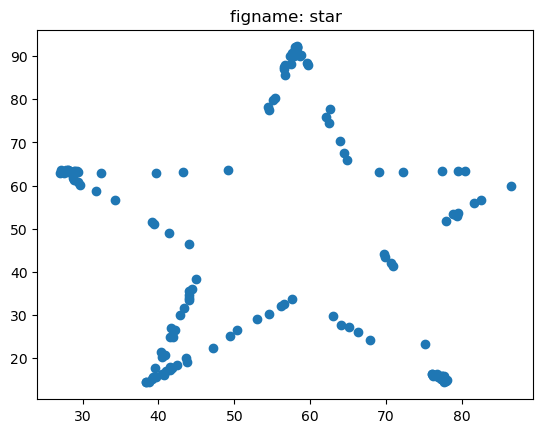

figname: high_lines
mic: 0.14
tic: 2.09
dcor: 0.15
dcov: 2.34
pearson: -0.069



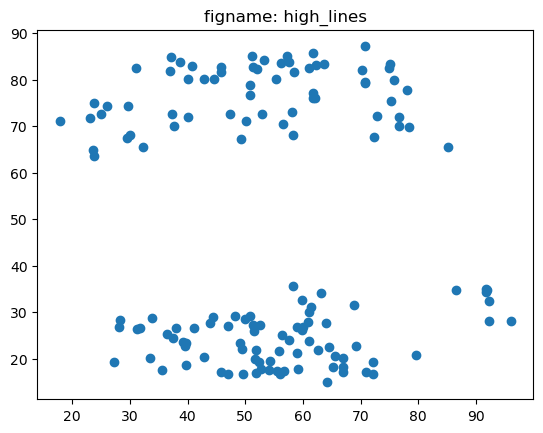

figname: wide_lines
mic: 0.15
tic: 2.62
dcor: 0.12
dcov: 1.94
pearson: -0.067



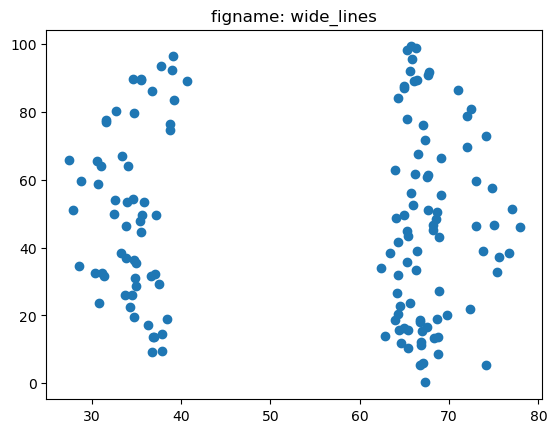

figname: h_lines
mic: 0.14
tic: 2.07
dcor: 0.15
dcov: 2.30
pearson: -0.062



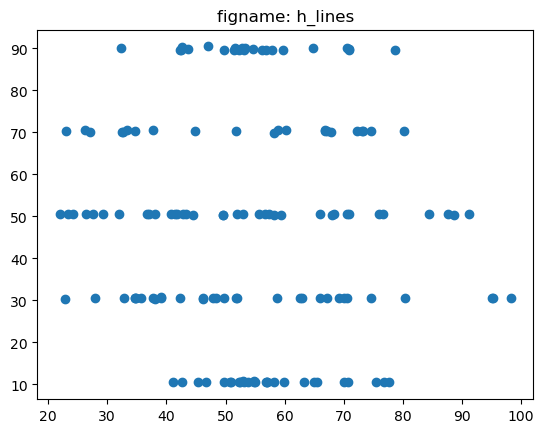

figname: v_lines
mic: 0.14
tic: 2.10
dcor: 0.16
dcov: 2.47
pearson: -0.069



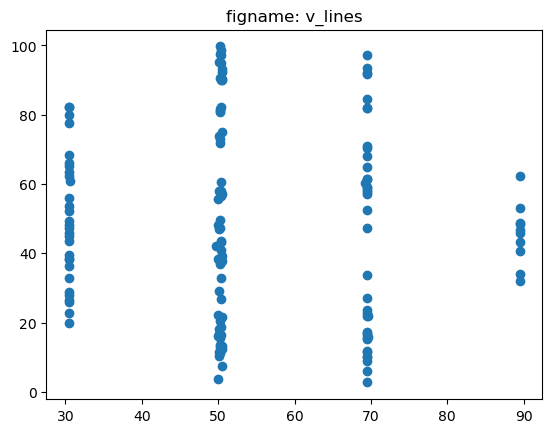

figname: circle
mic: 0.59
tic: 9.12
dcor: 0.23
dcov: 3.71
pearson: -0.068



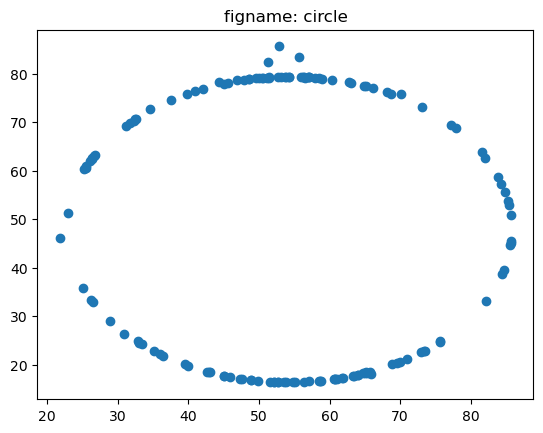

figname: bullseye
mic: 0.23
tic: 3.72
dcor: 0.18
dcov: 2.64
pearson: -0.069



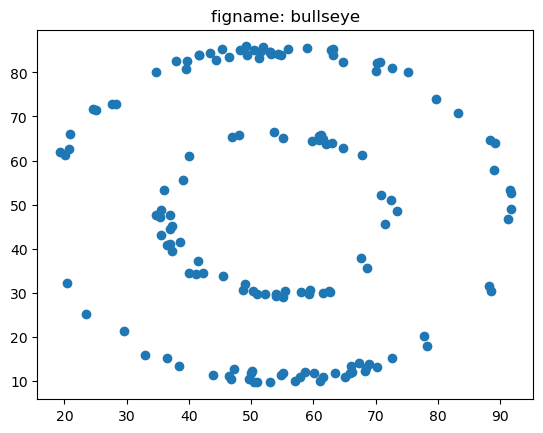

figname: x_shape
mic: 0.48
tic: 7.76
dcor: 0.20
dcov: 3.28
pearson: -0.066



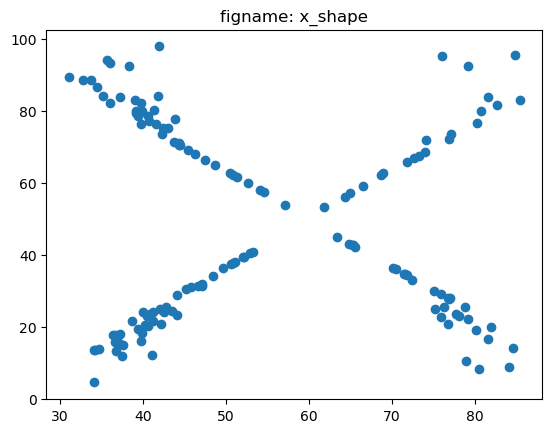

figname: dots
mic: 0.31
tic: 3.89
dcor: 0.13
dcov: 2.13
pearson: -0.060



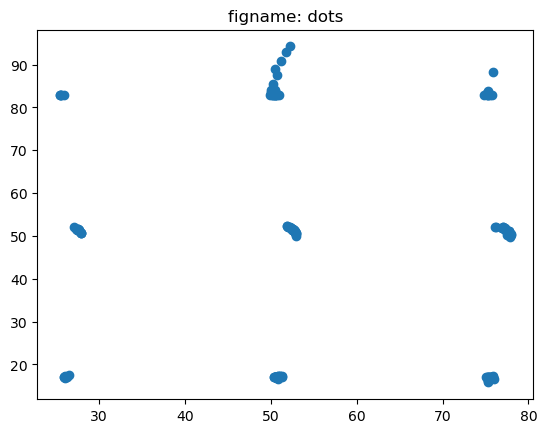

In [48]:
all_figs = {}
corr_df = pd.DataFrame(columns=['figname', 'mic', 'tic', 'dcor', 'dcov', 'pearson'])
for figname in ['dino'] + fig_order:
    fig, ax = plt.subplots()
    x = df[(df['figname'] == figname) & (df['axis'] == 'x')].values[0,2:]
    y = df[(df['figname'] == figname) & (df['axis'] == 'y')].values[0,2:]
    ax.scatter(x, y)

    # calculate mic, tic, dcor, dcov
    mic_, tic_ = mic_tic(x, y)
    dcor_, dcov_ = dcor_dcov(x, y)
 

    # calculate pearson
    pearson = pearsonr(x, y)[0]

    print(f'figname: {figname}')
    print(f'mic: {mic_:.2f}')
    print(f'tic: {tic_:.2f}')
    print(f'dcor: {dcor_:.2f}')
    print(f'dcov: {dcov_:.2f}')
    print(f'pearson: {pearson:.3f}')
    print('')

    ax.set_title(f'figname: {figname}')
    plt.show()  

    all_figs[figname] = (x,y)

    corr_df = pd.concat([corr_df, pd.DataFrame({'figname': figname, 'mic': mic_, 'tic': tic_, 'dcor': dcor_, 'dcov': dcov_, 'pearson': pearson}, index=[0])])

In [55]:
corr_df

,figname,mic,tic,dcor,dcov,pearson
0,dino,0.181166,2.672856,0.164496,2.360128,-0.064472
0,away,0.147178,1.772548,0.132554,2.102869,-0.064128
0,slant_down,0.206715,2.865615,0.162116,2.288410,-0.068980
0,slant_up,0.222253,3.366236,0.193162,2.789564,-0.068609
0,star,0.586842,8.785234,0.367006,5.895250,-0.062961
0,high_lines,0.139193,2.085035,0.147814,2.340866,-0.068504
0,wide_lines,0.153296,2.622886,0.116084,1.944138,-0.066575
0,h_lines,0.138472,2.069366,0.154884,2.303811,-0.061715
0,v_lines,0.140915,2.096712,0.160766,2.466261,-0.069446
0,circle,0.591451,9.116032,0.229175,3.705727,-0.068343


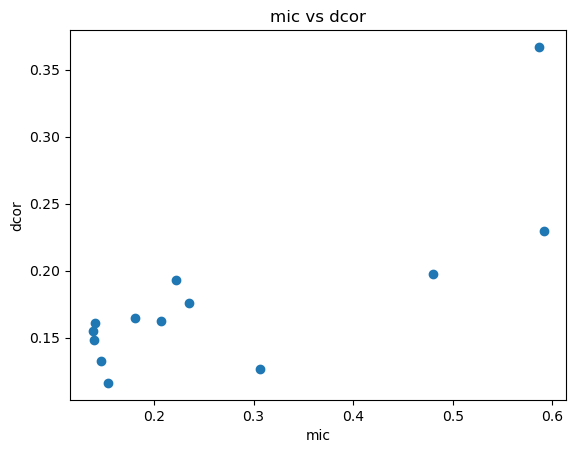

In [56]:
# plot mic vs dcor
fig, ax = plt.subplots()
ax.scatter(corr_df['mic'], corr_df['dcor'])
ax.set_xlabel('mic')
ax.set_ylabel('dcor')
ax.set_title('mic vs dcor')
plt.show()

In [54]:
corr_df.figname.str.split('_').str.join(' ').str.title()

0          Dino
0          Away
0    Slant Down
0      Slant Up
0          Star
0    High Lines
0    Wide Lines
0       H Lines
0       V Lines
0        Circle
0      Bullseye
0       X Shape
0          Dots
Name: figname, dtype: object

Text(0.5, 1.0, 'dino')

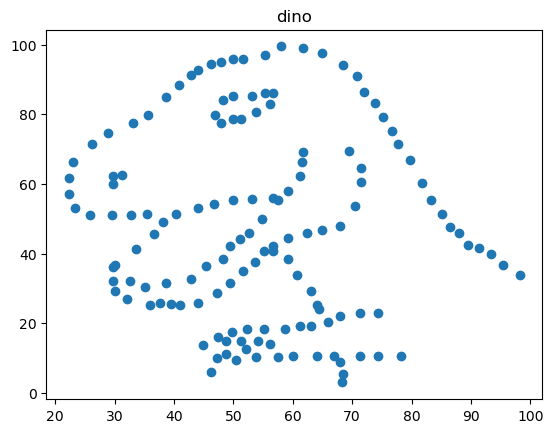

In [46]:
# plor dino 
fig, ax = plt.subplots()   
x, y = all_figs['dino']
ax.scatter(x, y)
ax.set_title('dino')

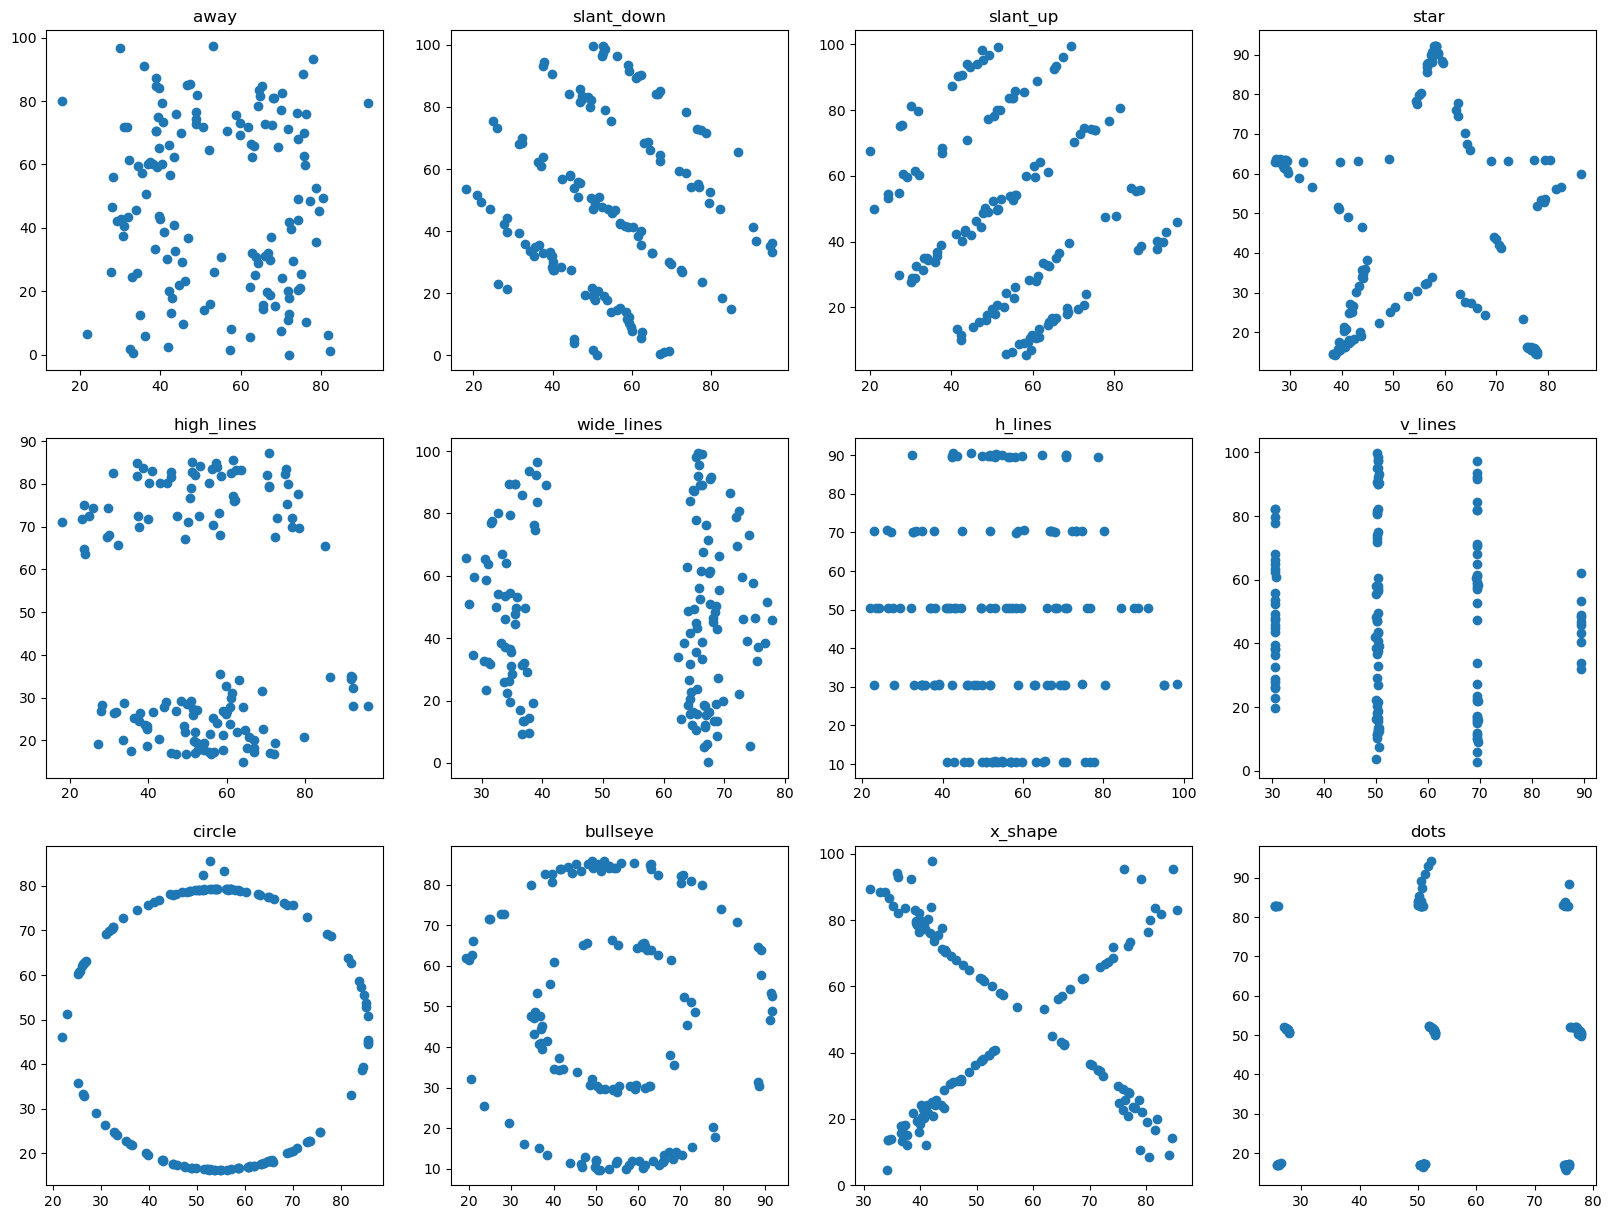

In [44]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
for i, figname in enumerate(fig_order):
    x, y = all_figs[figname]
    ax[i//4, i%4].scatter(x, y)
    ax[i//4, i%4].set_title(figname)